In [ ]:
import torch

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат.

In [ ]:
import torch

In [ ]:
class Neuron:
  def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

  def forward(self, inputs):
    y_pred = torch.dot(self.weights, inputs) + self.bias
    return y_pred


In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14
neuron = Neuron(weights, bias)
output = neuron.forward(inputs)

print(output)

tensor(4.8400)


2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат.

In [ ]:
class Linear:
  def __init__(self, weights, biases):
        self.weights = weights
        self.bias = biases

  def forward(self, inputs):
    y_pred = torch.matmul(inputs, self.weights.T) + self.bias
    return y_pred

In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]])

biases = torch.tensor([3.14, 2.71, 7.2])
neuron = Linear(weights, bias)
output = neuron.forward(inputs)

print(output)

tensor([4.8400, 0.6000, 6.3300])


2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [ ]:
class Linear:
    def __init__(self, weights, biases):
        self.weights = weights
        self.bias = biases

    def forward(self, inputs):
        y_pred = torch.matmul(inputs, self.weights.T) + self.bias
        return y_pred

In [ ]:
batch_size = 3
input_size = 4
inputs = torch.tensor([[1.0, 2.0, 3.0, 4.0],
                       [5.0, 6.0, 7.0, 8.0],
                       [9.0, 10.0, 11.0, 12.0]])

weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]])

biases = torch.tensor([3.14, 2.71, 7.2])

neuron = Linear(weights, biases)

output = neuron.forward(inputs)

print(output)


tensor([[ 4.8400,  0.1700, 10.3900],
        [ 6.0400, -2.4300, 12.4300],
        [ 7.2400, -5.0300, 14.4700]])


2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`,
реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [ ]:
import torch.nn as nn
import numpy as np

class Linear:
    def __init__(self, n_features, n_neurons):
        self.weights = torch.randn(n_features, n_neurons)
        self.bias = torch.zeros(n_neurons)

    def forward(self, inputs):
        y_pred = torch.matmul(inputs, self.weights) + self.bias
        return y_pred

batch_size = 3
n_features = 4
inputs = torch.randn(batch_size, n_features)

n_neurons = 5

neuron = Linear(n_features, n_neurons)

output = neuron.forward(inputs)

print(output)


tensor([[-0.7405, -0.6988,  0.2507,  0.0430, -0.2710],
        [ 2.4457,  5.4892,  1.0782, -2.0126, -1.5496],
        [-0.2231,  1.6616,  1.6182, -1.7181, -2.3947]])


In [ ]:
import torch

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7).

In [ ]:
class Linear:
    def __init__(self, n_features, n_neurons):
        self.weights = torch.randn(n_features, n_neurons)
        self.bias = torch.zeros(n_neurons)

    def forward(self, inputs):
        y_pred = torch.matmul(inputs, self.weights) + self.bias
        return y_pred

batch_size = 3
n_features = 4
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

n_neurons_layer1 = 5
n_neurons_layer2 = 7

layer1 = Linear(n_features, n_neurons_layer1)
layer2 = Linear(n_neurons_layer1, n_neurons_layer2)

output_layer1 = layer1.forward(inputs)
print(output_layer1)
output_layer2 = layer2.forward(output_layer1)

print(output_layer2)


tensor([[-6.8414, -6.9694,  1.8967, -5.0959,  9.0573],
        [-4.5650, -3.7419,  0.5676, -4.3584,  4.4749],
        [-5.4979, -9.7568,  5.2701,  0.9211,  4.9116]])
tensor([[ 13.7098,  33.9598,   6.9090,   0.9867,  -7.6900,  17.4046, -13.3664],
        [ 11.5876,  18.6908,   4.2606,   1.8532,  -2.3496,   9.2981,  -6.3649],
        [ -9.6565,  38.5038,   0.9165,  -1.9523, -11.7806,   4.9636, -19.8414]])


## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
import torch

matrix = torch.randn(4, 3)

def relu_activation(input_matrix):
    return torch.max(input_matrix, torch.zeros_like(input_matrix))

output_matrix = relu_activation(matrix)

print("Исходная матрица:")
print(matrix)
print("\nРезультат после применения ReLU:")
print(output_matrix)



Исходная матрица:
tensor([[ 0.6934,  0.9916,  0.4109],
        [ 0.1876, -1.8711, -0.0695],
        [-0.6685, -0.3066,  0.0381],
        [ 0.3359,  0.3563,  1.4360]])

Результат после применения ReLU:
tensor([[0.6934, 0.9916, 0.4109],
        [0.1876, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0381],
        [0.3359, 0.3563, 1.4360]])


2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [ ]:
matrix = torch.randn(4, 3)

def softmax_activation(input_matrix):
    exp_matrix = torch.exp(input_matrix)
    sum_exp = torch.sum(exp_matrix, dim=1, keepdim=True)
    softmax_output = exp_matrix / sum_exp
    return softmax_output

output_matrix = softmax_activation(matrix)

print("Исходная матр")
print(matrix)
print("\вероятности по классам")
print(output_matrix)


Исходная матр
tensor([[ 0.5412, -0.4202,  0.5221],
        [-0.1409,  0.6945,  0.7964],
        [-1.1110, -0.2893,  1.4531],
        [-0.1814, -0.5893, -2.2994]])
\вероятности по классам
tensor([[0.4231, 0.1618, 0.4151],
        [0.1707, 0.3936, 0.4358],
        [0.0615, 0.1398, 0.7987],
        [0.5601, 0.3725, 0.0674]])


2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
class ELU:
    def __init__(self, alpha):
        self.alpha = alpha

    def forward(self, inputs):
        return torch.where(inputs >= 0, inputs, self.alpha * (torch.exp(inputs) - 1))


In [ ]:
matrix = torch.randn(4, 3)
print(matrix)
elu_activation = ELU(alpha=1.0)

output = elu_activation.forward(matrix)

print(output)

tensor([[ 1.5251,  0.2707, -1.0165],
        [-0.5392,  0.8186,  0.3407],
        [ 1.7089, -0.8618,  0.5838],
        [ 0.7783, -1.3361, -0.9838]])
tensor([[ 1.5251,  0.2707, -0.6381],
        [-0.4168,  0.8186,  0.3407],
        [ 1.7089, -0.5776,  0.5838],
        [ 0.7783, -0.7371, -0.6261]])


## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
import torch
import torch.nn as nn

class LinearWith1Neuron(nn.Module):
    def __init__(self):
        super(LinearWith1Neuron, self).__init__()
        self.linear = nn.Linear(1, 1)  #1 вход, 1 выход

    def forward(self, x):
        return self.linear(x)

linear_layer = LinearWith1Neuron()

#входные данные
inputs = torch.tensor([[1.0], [2.0], [3.0], [4.0]])

#правильные ответы
actual_values = torch.tensor([[3.0], [5.0], [7.0], [9.0]])

#предсказания
predicted_values = linear_layer(inputs)

criterion = nn.MSELoss()
mse_loss = criterion(predicted_values, actual_values)

print("Предсказанные значения:")
print(predicted_values)
print("Фактические значения:")
print(actual_values)
print("MSE", mse_loss.item())


Предсказанные значения:
tensor([[0.0113],
        [0.9822],
        [1.9530],
        [2.9238]], grad_fn=<AddmmBackward0>)
Фактические значения:
tensor([[3.],
        [5.],
        [7.],
        [9.]])
MSE 21.866804122924805


2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LinearWith3Neurons(nn.Module):
    def __init__(self):
        super(LinearWith3Neurons, self).__init__()
        self.linear = nn.Linear(1, 3)  #1 вход, 3 выхода

    def forward(self, x):
        return self.linear(x)

linear_layer = LinearWith3Neurons()

inputs = torch.tensor([[1.0], [2.0], [3.0], [4.0]])

actual_labels = torch.tensor([1, 0, 2, 1])

predicted_logits = linear_layer(inputs)

predicted_probs = F.softmax(predicted_logits, dim=1)

cce_loss = F.cross_entropy(predicted_logits, actual_labels)

print(predicted_logits)
print("Предсказанные вероятности:")
print(predicted_probs)
print("Фактические метки классов:")
print(actual_labels)
print("Значение CCE (Categorical Cross-Entropy):", cce_loss.item())


tensor([[ 0.6601, -1.0544,  0.3177],
        [ 0.8002, -1.8930,  0.8424],
        [ 0.9403, -2.7316,  1.3671],
        [ 1.0804, -3.5702,  1.8918]], grad_fn=<AddmmBackward0>)
Предсказанные вероятности:
tensor([[0.5291, 0.0953, 0.3757],
        [0.4738, 0.0321, 0.4942],
        [0.3910, 0.0099, 0.5991],
        [0.3067, 0.0029, 0.6904]], grad_fn=<SoftmaxBackward0>)
Фактические метки классов:
tensor([1, 0, 2, 1])
Значение CCE (Categorical Cross-Entropy): 2.360739231109619


2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class LinearWith1NeuronL2(nn.Module):
    def __init__(self, l2_lambda):
        super(LinearWith1NeuronL2, self).__init__()
        self.linear = nn.Linear(1, 1)
        self.l2_lambda = l2_lambda

    def forward(self, x):
        return self.linear(x)


l2_lambda = 0.01
linear_layer = LinearWith1NeuronL2(l2_lambda)

inputs = torch.tensor([[1.0], [2.0], [3.0], [4.0]])

actual_values = torch.tensor([[3.0], [5.0], [7.0], [9.0]])

optimizer = optim.SGD(linear_layer.parameters(), lr=0.01)
criterion = nn.MSELoss()

epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()

    predicted_values = linear_layer(inputs)

    mse_loss = criterion(predicted_values, actual_values)

    l2_reg = 0.5 * l2_lambda * torch.sum(linear_layer.linear.weight ** 2) #штраф

    loss = mse_loss + l2_reg

    loss.backward() #обр распр
    optimizer.step() #обновл весов

trained_weights = linear_layer.linear.weight
trained_bias = linear_layer.linear.bias

print("Обученные веса:", trained_weights)
print("Обученное смещение (bias):", trained_bias)



tensor(9.1393, grad_fn=<AddBackward0>)


## 2.4 Обратное распространение ошибки

2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [ ]:
import torch.nn as nn
import torch
import torch.optim as optim
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

model = nn.Linear(4, 1)

criterion = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()

    outputs = model(X)

    loss = criterion(outputs, y)

    loss.backward()
    optimizer.step()

print("Learned coefficients:", model.weight.data)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Learned coefficients: tensor([[3.5281e-07, 8.4270e-07, 7.6639e-07, 1.8294e-07]])


[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [ ]:
class SquaredLoss:
    def forward(self, y_pred, y_true):
        #MSE
        loss = torch.mean((y_pred - y_true) ** 2)
        return loss

    def backward(self, y_pred, y_true):
        #градиент ошибки по отношению к предсказанным значениям (df/dc)
        num_samples = y_pred.shape[0]
        self.dinput = (2.0 / num_samples) * (y_pred - y_true)
        return self.dinput


2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [ ]:
import torch.nn as nn

class Neuron:
    def __init__(self, n_inputs):
        self.weights = torch.randn(n_inputs, 1, requires_grad=True)
        self.bias = torch.randn(1, requires_grad=True)

    def forward(self, inputs):
        self.inputs = inputs
        self.output = torch.matmul(inputs, self.weights) + self.bias
        return self.output

    def backward(self, dvalue):
        self.dweights = torch.matmul(self.inputs.t(), dvalue)
        self.dbias = torch.sum(dvalue)
        self.dinput = torch.matmul(dvalue, self.weights.t())
        return self.dinput

2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи:
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами


In [ ]:
class MSELoss:
    def forward(self, y_pred, y_true):
        self.diff = y_pred - y_true
        self.loss = torch.mean(self.diff ** 2)
        return self.loss

    def backward(self):
        num_samples = self.diff.size(0)
        self.dinput = (2.0 / num_samples) * self.diff
        return self.dinput


2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными.

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [ ]:
class Neuron:
    def __init__(self, n_inputs):
        # Инициализация весов и смещения из стандартного нормального распределения
        self.weights = torch.randn(n_inputs, 1, requires_grad=True)
        self.bias = torch.randn(1, requires_grad=True)

    def forward(self, inputs):
        # Прямой проход для батча данных
        self.inputs = inputs
        self.output = torch.matmul(inputs, self.weights) + self.bias
        return self.output

    def backward(self, dvalue):
        # Рассчет градиента относительно весов weights и bias
        num_samples = dvalue.size(0)
        self.dweights = torch.matmul(self.inputs.t(), dvalue) / num_samples
        self.dbias = torch.sum(dvalue, dim=0, keepdim=True) / num_samples
        return torch.matmul(dvalue, self.weights.t())  # Градиент по входу


2.4.2.3 Допишите цикл для настройки весов нейрона

In [ ]:
X = torch.tensor([[1.0, 2.0, 3.0, 2.5],
                  [2.0, 5.0, -1.0, 2.0],
                  [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([[2.0],
                  [3.0],
                  [4.0]])

n_inputs = X.shape[1]
neuron = Neuron(n_inputs)
loss = MSELoss()

for epoch in range(n_epoch):
    y_pred = neuron.forward(X)
    curr_loss = loss.forward(y_pred, y)
    losses.append(curr_loss.item())

    dvalue = loss.backward()
    neuron.backward(dvalue)

neuron.weights.data -= learning_rate * neuron.dweights
neuron.bias.data -= learning_rate * neuron.dbias.view(neuron.bias.shape)

print("Learned weights:", neuron.weights)
print("Learned bias:", neuron.bias)

Learned weights: tensor([[0.1792],
        [0.0869],
        [1.3221],
        [0.3683]], requires_grad=True)
Learned bias: tensor([0.0284], requires_grad=True)


2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [ ]:
class Linear:
    def __init__(self, n_features, n_neurons):
        self.weights = torch.randn(n_features, n_neurons, requires_grad=True)
        self.biases = torch.randn(1, n_neurons, requires_grad=True)

    def forward(self, inputs):
        self.inputs = inputs
        self.output = torch.matmul(inputs, self.weights) + self.biases
        return self.output

    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.t(), dvalues)
        self.dbiases = torch.sum(dvalues, dim=0, keepdim=True)
        self.dinputs = torch.matmul(dvalues, self.weights.t())


2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [ ]:
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

X, y, coef = make_regression(n_samples=100, n_features=4, noise=0.1, coef=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.reshape(-1, 1)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

n_features = X.shape[1]
n_neurons = 1
layer = Linear(n_features, n_neurons)

criterion = MSELoss()
optimizer = optim.SGD([layer.weights, layer.biases], lr=0.01)

batch_size = 16
num_epochs = 100

for epoch in range(num_epochs):
    for i in range(0, X.size(0), batch_size):
        x_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]

        optimizer.zero_grad()

        outputs = layer.forward(x_batch)

        loss = criterion.forward(outputs, y_batch)

        dvalues = criterion.backward()
        layer.backward(dvalues)

        optimizer.step()

predictions = layer.forward(X)
print("Learned weights:", layer.weights)
print("Learned bias:", layer.biases)


AttributeError: ignored

2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(10, 10)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(10, 1)


    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

model = RegressionModel()

loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.02)


In [ ]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

ys = []

for epoch in range(2001):
    optimizer.zero_grad()


    outputs = model(X)
    data_loss = loss(outputs, y)

    if epoch % 200 == 0:
        print(f'epoch {epoch} mean loss {data_loss.item()}')
        ys.append(outputs.detach())

    data_loss.backward()

    #шаг оптимизации для обновления весов
    optimizer.step()


epoch 0 mean loss 0.24279136955738068
epoch 200 mean loss 0.07788869738578796
epoch 400 mean loss 0.05691361054778099
epoch 600 mean loss 0.033848270773887634
epoch 800 mean loss 0.017637204378843307
epoch 1000 mean loss 0.010964916087687016
epoch 1200 mean loss 0.00846498366445303
epoch 1400 mean loss 0.007145739626139402
epoch 1600 mean loss 0.006173228845000267
epoch 1800 mean loss 0.005456307902932167
epoch 2000 mean loss 0.004882568493485451


In [ ]:
class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output

  def backward(self, dvalues):
    self.dinputs = dvalues.clone()
    self.dinputs[self.inputs <= 0] = 0

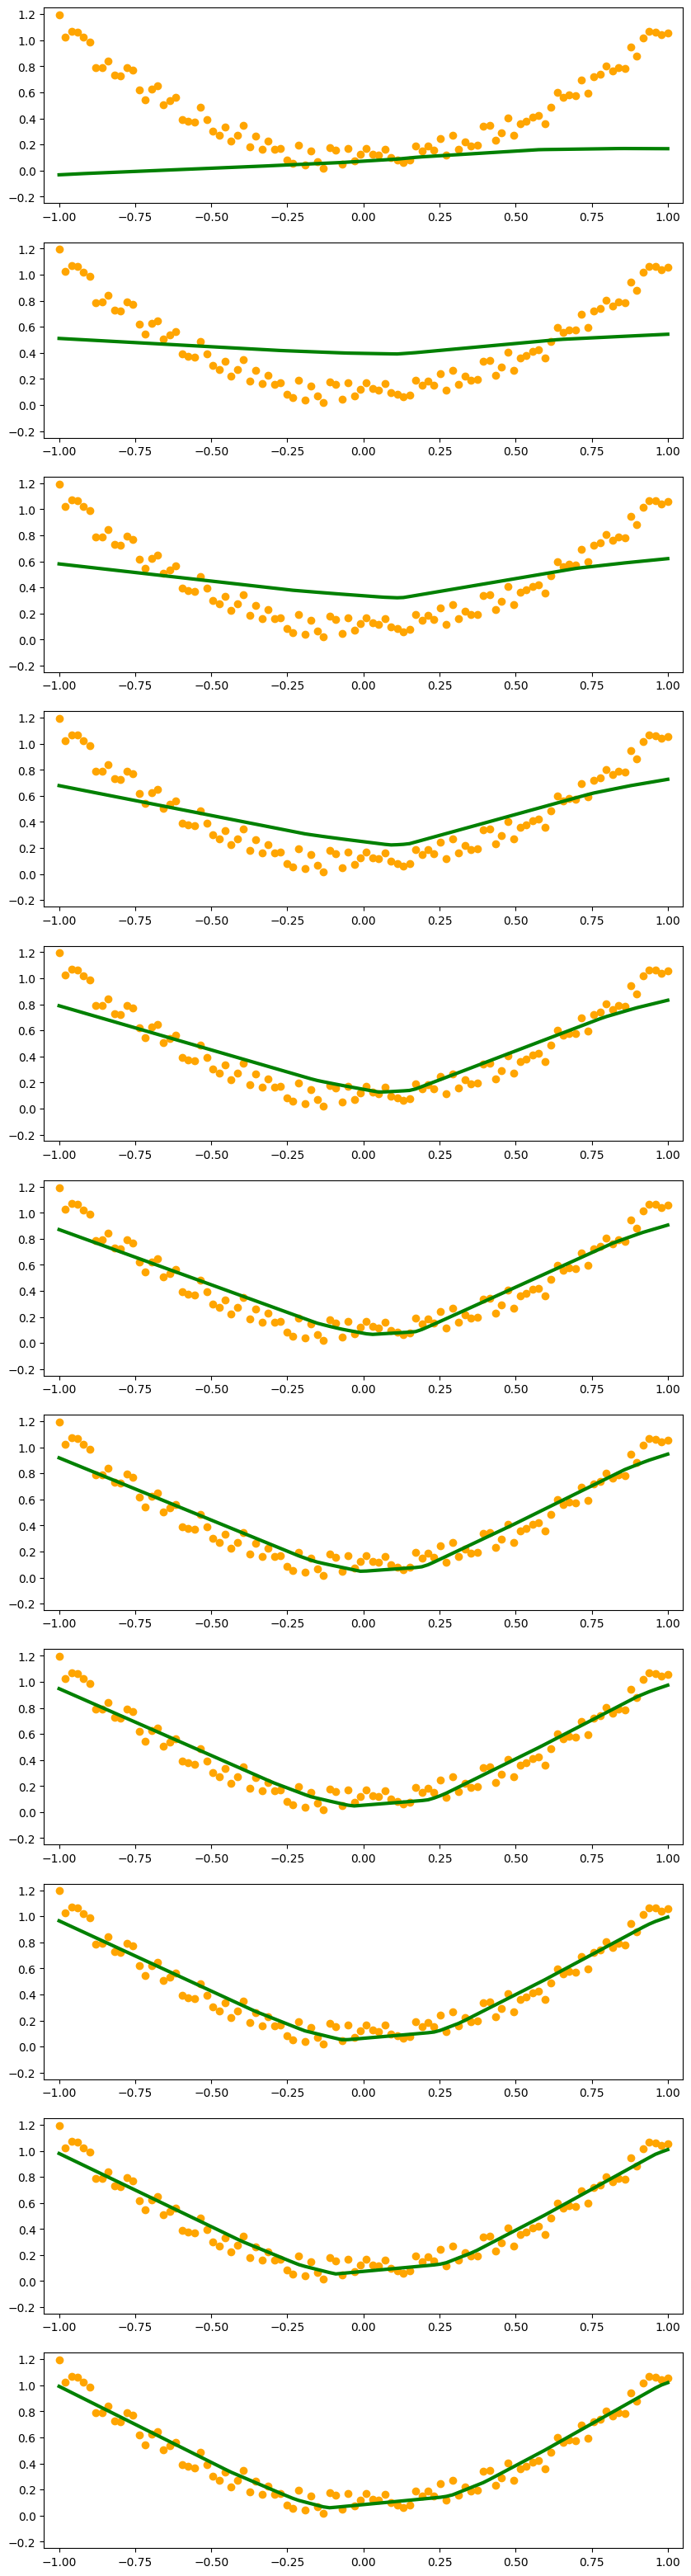

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
    ax.scatter(X.numpy(), y.numpy(), color="orange")
    ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
    ax.set_xlim(-1.05, 1.05)
    ax.set_ylim(-0.25, 1.25)

plt.show()
